In [25]:
# Importações

import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Carregar base de dados

df_open_source = pd.read_csv('/content/drive/MyDrive/Reprograma/base_software_livre.csv')

In [27]:
# Verificar carregamento

df_open_source.head()

,Country,Region,Issuing Area of Government,Title,Type,Date,OSS Specific?,Cost,Sovereignty,Support for National Industry,Modernization,Transparency,Security,Action,Term,Status,Comments,Source,Source II,Notes
0,Argentina,South America,Legislative,2607-D-2007,Support,2007,Yes,X,-,X,-,-,-,Procurement - advisory,FLOSS / FOSS,Failed,Advises to replace operating systems in the Ch...,https://www.hcdn.gob.ar/proyectos/textoComplet...,NaN,NaN
1,Argentina,South America,Legislative,Bill 5613-D-2000: Regime For the Use of Intell...,Bill,2001,Yes,X,-,-,X,-,-,Procurement - mandatory,FLOSS / FOSS,Failed,Article 2 of the Bill known as the Bill of Fre...,https://web.archive.org/web/20130525102452/htt...,NaN,NaN
2,Argentina,South America,Legislative,0904-D-2002: Bill of Free Software V5,Bill,2002,Yes,X,X,-,-,-,-,Procurement - mandatory,FLOSS / FOSS,Failed,"The Bill of Free Software V5, mandating OSS in...",https://web.archive.org/web/20130525085055/htt...,NaN,NaN
3,Argentina,South America,Legislative,Bill 1280-D-2004,Bill,2004,Yes,X,-,X,-,X,-,Procurement - mandatory,FLOSS / FOSS,Failed,"After Bill 904-D-02 expired in March, Bill 128...",https://web.archive.org/web/20130620085821/htt...,NaN,NaN
4,Argentina,South America,Legislative,6717-D-2006: Implementation of Free Software b...,Bill,2006,Yes,X,-,X,X,-,-,Procurement - mandatory,FLOSS / FOSS,Failed,"All branches of government, the independent an...",https://www.hcdn.gob.ar/proyectos/textoComplet...,NaN,NaN


In [28]:
# Verificar colunas

df_open_source.columns

Index(['Country', 'Region', 'Issuing Area of Government', 'Title', 'Type',
       'Date', 'OSS Specific?', 'Cost', 'Sovereignty',
       'Support for National Industry', 'Modernization', 'Transparency',
       'Security', 'Action', 'Term', 'Status', 'Comments', 'Source',
       'Source II', 'Notes'],
      dtype='object')

In [29]:
# Tratando dados para interpretação

df_open_source = df_open_source.replace({'X': True, '-': False, '': False, pd.NA: False})

<ipython-input-29-039062abba0e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_open_source = df_open_source.replace({'X': True, '-': False, '': False, pd.NA: False})


In [30]:
# Verificar carregamento

df_open_source.head()

,Country,Region,Issuing Area of Government,Title,Type,Date,OSS Specific?,Cost,Sovereignty,Support for National Industry,Modernization,Transparency,Security,Action,Term,Status,Comments,Source,Source II,Notes
0,Argentina,South America,Legislative,2607-D-2007,Support,2007,Yes,True,False,True,False,False,False,Procurement - advisory,FLOSS / FOSS,Failed,Advises to replace operating systems in the Ch...,https://www.hcdn.gob.ar/proyectos/textoComplet...,False,False
1,Argentina,South America,Legislative,Bill 5613-D-2000: Regime For the Use of Intell...,Bill,2001,Yes,True,False,False,True,False,False,Procurement - mandatory,FLOSS / FOSS,Failed,Article 2 of the Bill known as the Bill of Fre...,https://web.archive.org/web/20130525102452/htt...,False,False
2,Argentina,South America,Legislative,0904-D-2002: Bill of Free Software V5,Bill,2002,Yes,True,True,False,False,False,False,Procurement - mandatory,FLOSS / FOSS,Failed,"The Bill of Free Software V5, mandating OSS in...",https://web.archive.org/web/20130525085055/htt...,False,False
3,Argentina,South America,Legislative,Bill 1280-D-2004,Bill,2004,Yes,True,False,True,False,True,False,Procurement - mandatory,FLOSS / FOSS,Failed,"After Bill 904-D-02 expired in March, Bill 128...",https://web.archive.org/web/20130620085821/htt...,False,False
4,Argentina,South America,Legislative,6717-D-2006: Implementation of Free Software b...,Bill,2006,Yes,True,False,True,True,False,False,Procurement - mandatory,FLOSS / FOSS,Failed,"All branches of government, the independent an...",https://www.hcdn.gob.ar/proyectos/textoComplet...,False,False


In [31]:
# Traduzindo as colunas
traducao_colunas = {
    'Country': 'País',
    'Region': 'Região',
    'Issuing Area of Government': 'Área do Governo Emissor',
    'Title': 'Título',
    'Type': 'Tipo',
    'Date': 'Data',
    'OSS Specific?': 'OSS Específico?',
    'Cost': 'Custo',
    'Sovereignty': 'Soberania',
    'Support for National Industry': 'Apoio à Indústria Nacional',
    'Modernization': 'Modernização',
    'Transparency': 'Transparência',
    'Security': 'Segurança',
    'Action': 'Ação',
    'Term': 'Termo',
    'Status': 'Status',
    'Comments': 'Comentários',
    'Source': 'Fonte'
}

# Aplicando a tradução ao DataFrame
df_open_source.rename(columns=traducao_colunas, inplace=True)


In [42]:
# Traduzindo respostas

traducao_respostas = {

    'Prazo': 'Termo',

     # Tradução de regiões
    'South America': 'América do Sul',
    'Europe': 'Europa',
    'North America': 'América do Norte',
    'Asia': 'Ásia',
    'Africa': 'África',
    'Oceania': 'Oceania',

      # Tradução de área do governo emissor
    'Legislative': 'Legislativo',
    'Executive': 'Executivo',
    'Judiciary': 'Judiciário',

    # Tradução coluna 'Type'
    'Support': 'Apoio',
    'Bill': 'Projeto de Lei',

    # Tradução coluna 'Status'
    'Failed': 'Falhou',
    'Passed': 'Aprovado',
    'Pending': 'Pendente',

    # Tradução coluna 'Action'
    'Procurement - advisory': 'Aquisição - consultivo',
    'Procurement - mandatory': 'Aquisição - obrigatório',

    # Tradução coluna 'Term'
    'FLOSS / FOSS': 'Software Livre / Código Aberto',

    # Tradução yesno
    'Yes': 'Sim',
    'No': 'Não',
}

# Função para aplicar a tradução nas células
def translate_value(value, patterns):
    if isinstance(value, str):
        for english, portuguese in patterns.items():
            value = value.replace(english, portuguese)
    return value

# Aplicar a função de tradução a todo o DataFrame
df_open_source_traduzido = df_open_source.applymap(lambda x: translate_value(x, traducao_respostas))


<ipython-input-42-b08a140ed280>:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_open_source_traduzido = df_open_source.applymap(lambda x: translate_value(x, traducao_respostas))


In [43]:
df_open_source_traduzido.head()

,País,Região,Área do Governo Emissor,Título,Tipo,Data,OSS Específico?,Custo,Soberania,Apoio à Indústria Nacional,Modernização,Transparência,Segurança,Ação,Termo,Status,Comentários,Fonte,Source II,Notes
0,Argentina,América do Sul,Legislativo,2607-D-2007,Apoio,2007,Sim,True,False,True,False,False,False,Aquisição - consultivo,Software Livre / Código Aberto,Falhou,Advises to replace operating systems in the Ch...,https://www.hcdn.gob.ar/proyectos/textoComplet...,False,False
1,Argentina,América do Sul,Legislativo,Projeto de Lei 5613-D-2000: Regime For the Use...,Projeto de Lei,2001,Sim,True,False,False,True,False,False,Aquisição - obrigatório,Software Livre / Código Aberto,Falhou,Article 2 of the Projeto de Lei known as the P...,https://web.archive.org/web/20130525102452/htt...,False,False
2,Argentina,América do Sul,Legislativo,0904-D-2002: Projeto de Lei of Free Software V5,Projeto de Lei,2002,Sim,True,True,False,False,False,False,Aquisição - obrigatório,Software Livre / Código Aberto,Falhou,"The Projeto de Lei of Free Software V5, mandat...",https://web.archive.org/web/20130525085055/htt...,False,False
3,Argentina,América do Sul,Legislativo,Projeto de Lei 1280-D-2004,Projeto de Lei,2004,Sim,True,False,True,False,True,False,Aquisição - obrigatório,Software Livre / Código Aberto,Falhou,After Projeto de Lei 904-D-02 expired in March...,https://web.archive.org/web/20130620085821/htt...,False,False
4,Argentina,América do Sul,Legislativo,6717-D-2006: Implementation of Free Software b...,Projeto de Lei,2006,Sim,True,False,True,True,False,False,Aquisição - obrigatório,Software Livre / Código Aberto,Falhou,"All branches of government, the independent an...",https://www.hcdn.gob.ar/proyectos/textoComplet...,False,False


In [34]:
# Limpeza de dados
# Retirar colunas irrelevantes
colunas_removidas = ['Source II', 'Notes']
df_open_source_tratada = df_open_source_traduzido.drop(columns=colunas_removidas)

In [35]:
# Verificar colunas
df_open_source_tratada.columns

Index(['País', 'Região', 'Área do Governo Emissor', 'Título', 'Tipo', 'Data',
       'OSS Específico?', 'Custo', 'Soberania', 'Apoio à Indústria Nacional',
       'Modernização', 'Transparência', 'Segurança', 'Ação', 'Termo', 'Status',
       'Comentários', 'Fonte'],
      dtype='object')

In [36]:
# Identificar nulos

df_open_source_tratada.isnull().sum()

,0
País,0
Região,0
Área do Governo Emissor,0
Título,0
Tipo,0
Data,0
OSS Específico?,0
Custo,0
Soberania,0
Apoio à Indústria Nacional,0


# Correção de texto

In [61]:
# Dicionário de correções e traduções
correcoes_regiao = {
    'América do Nãorte': 'América do Norte',
    'Middle East': 'Oriente Médio',
    'Central America and the Caribbean': 'América Central e Caribe'
}

# Dicionário de tradução dos termos em inglês
traducoes_acao = {
    'How to Use': 'Como Usar',
    'How to use': 'Como Usar',
    'R&D': 'Pesquisa e Desenvolvimento (P&D)',
    'Training': 'Treinamento',
    'Tech Neutrality': 'Neutralidade Tecnológica',
    'Cooperation': 'Cooperação',
    'Repository': 'Repositório'
}

# Aplicar as traduções na coluna 'Ação'
df_open_source_tratada['Ação'] = df_open_source_tratada['Ação'].replace(traducoes_acao)

# Aplicar as correções no dataframe
df_open_source_tratada['Região'] = df_open_source_tratada['Região'].replace(correcoes_regiao)

# Verificar se as correções foram aplicadas corretamente
print(df_open_source_tratada['Região'].unique())
print(df_open_source_tratada['Ação'].unique())

['América do Sul' 'Oriente Médio' 'Oceania' 'Europa' 'Ásia'
 'América Central e Caribe' 'África' 'América do Norte']
['Aquisição - consultivo' 'Aquisição - obrigatório' 'Como Usar'
 'Pesquisa e Desenvolvimento (P&D)' 'Treinamento'
 'Neutralidade Tecnológica' 'Cooperação' 'Repositório']


In [62]:
df_open_source_tratada.head()

,País,Região,Área do Governo Emissor,Título,Tipo,Data,OSS Específico?,Custo,Soberania,Apoio à Indústria Nacional,Modernização,Transparência,Segurança,Ação,Termo,Status,Comentários,Fonte
0,Argentina,América do Sul,Legislativo,2607-D-2007,Apoio,2007,Sim,True,False,True,False,False,False,Aquisição - consultivo,Software Livre / Código Aberto,Falhou,Advises to replace operating systems in the Ch...,https://www.hcdn.gob.ar/proyectos/textoComplet...
1,Argentina,América do Sul,Legislativo,Projeto de Lei 5613-D-2000: Regime For the Use...,Projeto de Lei,2001,Sim,True,False,False,True,False,False,Aquisição - obrigatório,Software Livre / Código Aberto,Falhou,Article 2 of the Projeto de Lei known as the P...,https://web.archive.org/web/20130525102452/htt...
2,Argentina,América do Sul,Legislativo,0904-D-2002: Projeto de Lei of Free Software V5,Projeto de Lei,2002,Sim,True,True,False,False,False,False,Aquisição - obrigatório,Software Livre / Código Aberto,Falhou,"The Projeto de Lei of Free Software V5, mandat...",https://web.archive.org/web/20130525085055/htt...
3,Argentina,América do Sul,Legislativo,Projeto de Lei 1280-D-2004,Projeto de Lei,2004,Sim,True,False,True,False,True,False,Aquisição - obrigatório,Software Livre / Código Aberto,Falhou,After Projeto de Lei 904-D-02 expired in March...,https://web.archive.org/web/20130620085821/htt...
4,Argentina,América do Sul,Legislativo,6717-D-2006: Implementation of Free Software b...,Projeto de Lei,2006,Sim,True,False,True,True,False,False,Aquisição - obrigatório,Software Livre / Código Aberto,Falhou,"All branches of government, the independent an...",https://www.hcdn.gob.ar/proyectos/textoComplet...


In [63]:
# Colunas com os motivos declarados para adoção de OSS
motivos_cols = ['Custo', 'Soberania', 'Apoio à Indústria Nacional', 'Modernização', 'Transparência', 'Segurança']

# Converter valores "True" e "False" ou strings semelhantes para valores booleanos reais (caso ainda não tenha feito)
df_open_source_tratada[motivos_cols] = df_open_source_tratada[motivos_cols].replace({'True': True, 'False': False})

# Certifique-se de que todas as colunas contenham valores booleanos ou numéricos
df_open_source_tratada[motivos_cols] = df_open_source_tratada[motivos_cols].astype(bool)

In [64]:
# Salvando o DataFrame em um novo arquivo CSV
data_file_path = '/content/drive/MyDrive/Reprograma/base_software_livre_tratada.csv'

# Salvar o arquivo CSV no Google Drive
df_open_source_tratada.to_csv(data_file_path, index=False)

# Distribuição percentual dos motivos declarados para adoção do Software Livre

## Identificar os principais motivos que levam os governos a adotar o software livre

###  A análise compara a proporção de cada motivo em relação ao total de justificativas.


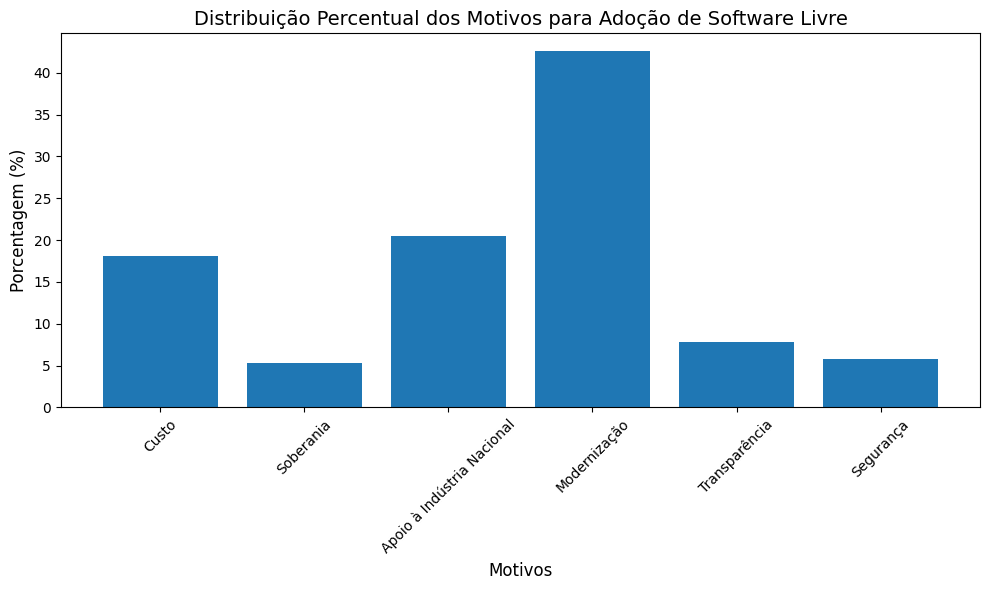

In [65]:
# Contar quantas vezes cada motivo foi declarado
motivos_sum = df_open_source_tratada[motivos_cols].sum()

# Calcular o total de ocorrências e a porcentagem
total_ocorrencias = motivos_sum.sum()
motivos_percent = (motivos_sum / total_ocorrencias) * 100

# Criar gráfico de barras com as porcentagens
plt.figure(figsize=(10,6))
plt.bar(motivos_percent.index, motivos_percent.values)
plt.title("Distribuição Percentual dos Motivos para Adoção de Software Livre", fontsize=14)
plt.xlabel("Motivos", fontsize=12)
plt.ylabel("Porcentagem (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#Distribuição Percentual Global de Políticas de Software Livre por Região
## Analisar a distribuição geográfica das políticas de software livre no mundo para entender quais regiões estão mais avançadas nesse quesito.

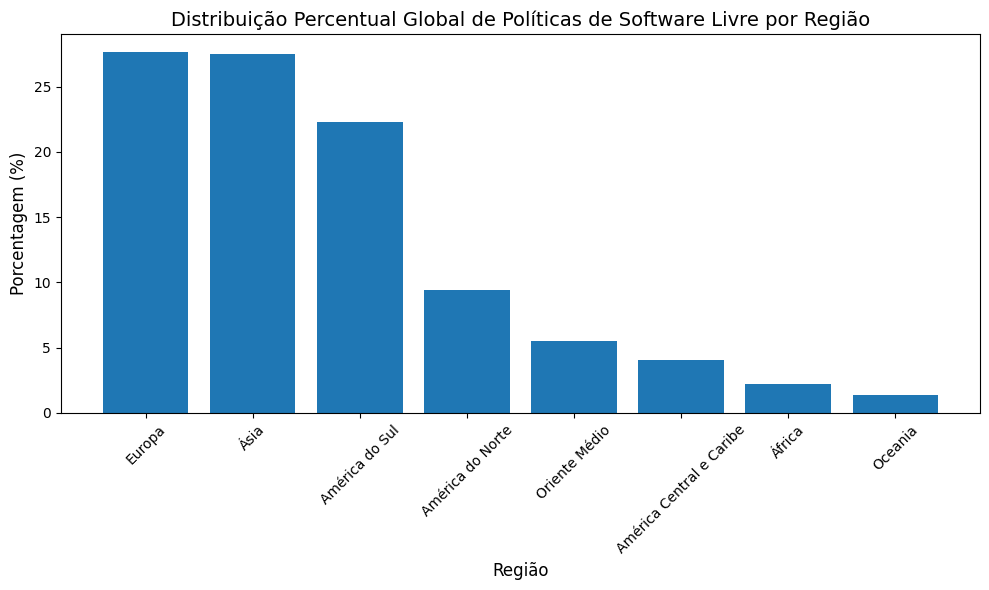

In [66]:
# Contar o número de políticas por região
regiao_contagem = df_open_source_tratada['Região'].value_counts()

# Calcular a porcentagem para cada região
total_politicas = regiao_contagem.sum()
regiao_percent = (regiao_contagem / total_politicas) * 100

# Criar gráfico de barras com porcentagens
plt.figure(figsize=(10,6))
plt.bar(regiao_percent.index, regiao_percent.values)
plt.title("Distribuição Percentual Global de Políticas de Software Livre por Região", fontsize=14)
plt.xlabel("Região", fontsize=12)
plt.ylabel("Porcentagem (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Distribuição Percentual dos Tipos de Ação Relacionados ao Software Livre
## Exibe a distribuição percentual dos tipos de ações implementadas pelos governos em suas políticas de software livre
### Permite uma compreensão mais clara da ênfase governamental em diferentes frentes de implementação

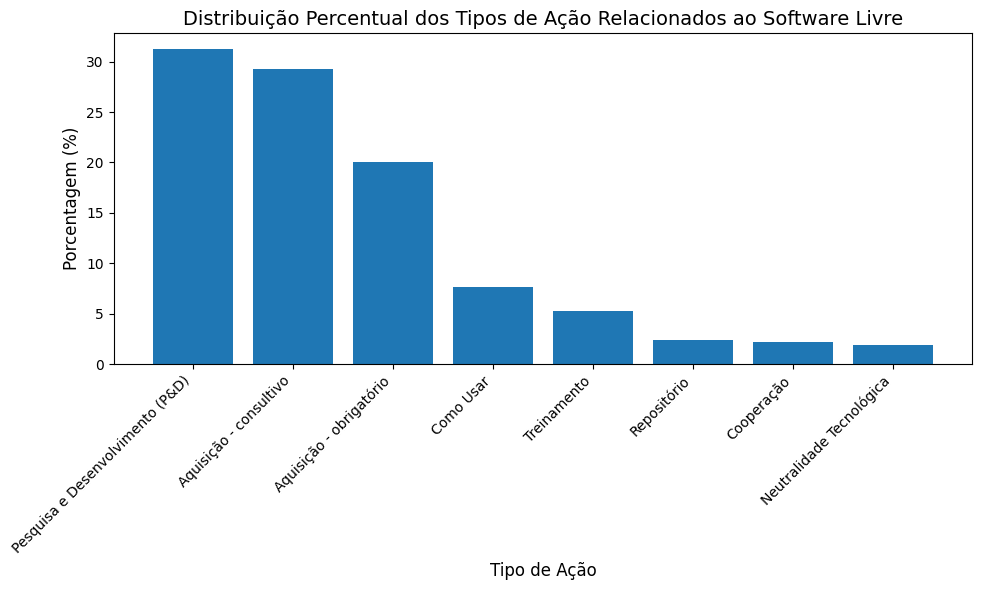

In [67]:
# Contar os tipos de ação relacionados ao software livre
acao_contagem = df_open_source_tratada['Ação'].value_counts()

# Calcular a porcentagem para cada tipo de ação
total_acoes = acao_contagem.sum()
acao_percent = (acao_contagem / total_acoes) * 100

# Criar gráfico de barras com porcentagens
plt.figure(figsize=(10,6))
plt.bar(acao_percent.index, acao_percent.values)
plt.title("Distribuição Percentual dos Tipos de Ação Relacionados ao Software Livre", fontsize=14)
plt.xlabel("Tipo de Ação", fontsize=12)
plt.ylabel("Porcentagem (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
